In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import norm
%matplotlib inline

In [9]:
def Gaussian(data):
    mu, std = norm.fit(data)
    
    xmin = np.min(data)
    xmax = np.max(data)
    
    x = np.linspace(xmin,xmax, 100)
    p = norm.pdf(x, mu, std)
    return p

In [10]:
df_Dirac_G_O = (1/2)*pd.read_csv(r'Channel/Dirac_G_O_Channel.txt', sep = '\t', header = None)
df_Dirac_P_O = (1/2)*pd.read_csv(r'Channel/Dirac_P_O_Channel.txt', sep = '\t', header = None)

df_Dirac_G_U = (1/2)*pd.read_csv(r'Channel/Dirac_G_U_Channel.txt', sep = '\t', header = None)
df_Dirac_P_U = (1/2)*pd.read_csv(r'Channel/Dirac_P_U_Channel.txt', sep = '\t', header = None)

df_Dirac_G_S = (1/2)*pd.read_csv(r'Channel/Dirac_G_S_Channel.txt', sep = '\t', header = None)
df_Dirac_P_S = (1/2)*pd.read_csv(r'Channel/Dirac_P_S_Channel.txt', sep = '\t', header = None)

In [11]:
df_Dirac_G_O.rename(columns = lambda s:s+1, index = lambda s: s+1)
#The rows and columns represent the steps (billiards setups of chaotic ensemble) and the open channels, respectively.

,1,2,3,4,5,6,7,8,9,10
1,0.099017,0.679315,1.393360,1.370800,2.170580,2.110470,2.807675,3.025625,3.522325,3.569065
2,0.966920,0.874515,1.152585,1.454480,2.397000,2.187820,2.845995,2.955050,3.939535,4.072815
3,0.364397,0.436727,1.029675,1.859340,2.236650,2.612520,2.711565,2.837430,3.691840,3.967250
4,0.298972,0.579170,1.060560,1.522285,1.822890,2.943145,2.712605,3.170230,3.431135,3.417930
5,0.344110,0.742425,1.131080,2.007350,2.083965,1.953850,2.707190,2.865140,3.590780,4.246415
...,...,...,...,...,...,...,...,...,...,...
99996,0.702945,0.663610,1.017585,1.587775,1.852570,2.352655,2.825625,3.418895,3.541730,3.824450
99997,0.210382,1.025330,1.153970,1.059550,1.869440,2.919720,2.918135,3.274375,3.572850,3.752450
99998,0.041899,0.363809,1.433360,1.555490,1.932755,2.139780,2.760170,3.308490,3.734760,4.024990
99999,0.522370,0.643200,1.654635,1.363900,2.181915,2.250105,2.654890,3.270315,3.915565,4.144340


In [12]:
G_O = df_Dirac_G_O.values
P_O = df_Dirac_P_O.values

G_U = df_Dirac_G_U.values
P_U = df_Dirac_P_U.values

G_S = df_Dirac_G_S.values
P_S = df_Dirac_P_S.values

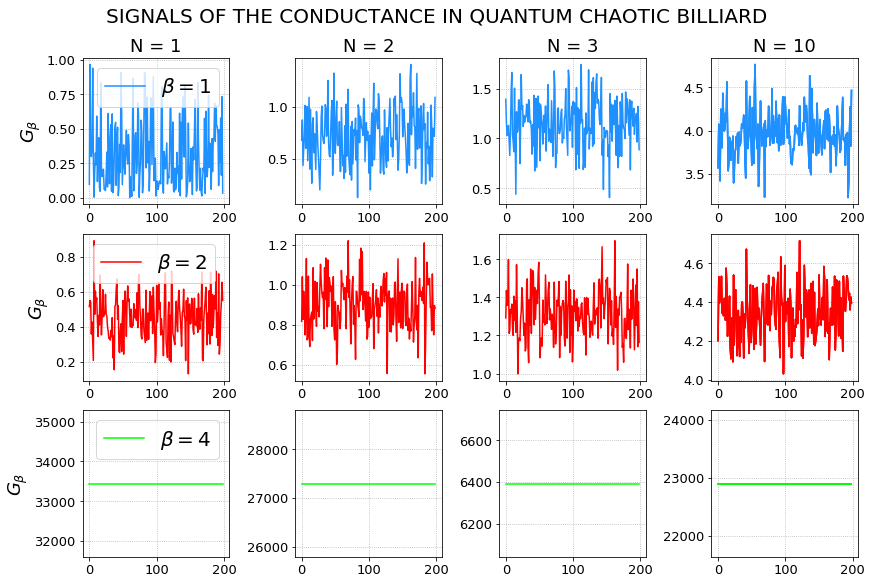

In [13]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'SIGNALS OF THE CONDUCTANCE IN QUANTUM CHAOTIC BILLIARD', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].plot(G_O[0:199,9], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            axs[1,3].plot(G_U[0:199,9], color='red', label = r'$\beta = 2$', alpha=1);
            axs[2,3].plot(G_S[0:199,9], color='lime', label = r'$\beta = 4$', alpha=1);
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].plot(G_O[0:199,j], color='dodgerblue', label = r'$\beta = 1$', alpha=1);
            else:
                if (i == 1):
                    axs[i,j].plot(G_U[0:199,j], color='red', label = r'$\beta = 2$', alpha=1);
                else:
                    if (i == 2):
                        axs[i,j].plot(G_S[0:199,j], color='lime', label = r'$\beta = 4$', alpha=1);
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$G_{\beta}$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        axs[i,j].grid(linestyle=':')

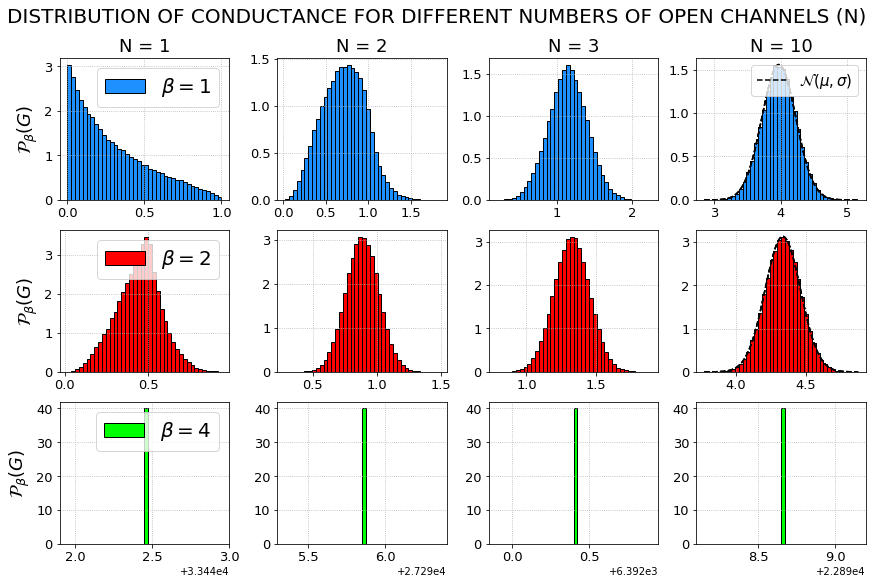

In [14]:
steps = 50

fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF CONDUCTANCE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(G_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(G_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(G_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');

            x = np.linspace(np.min(G_O[:,9]), np.max(G_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(G_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(G_U[:,9]), np.max(G_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(G_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(G_S[:,9]), np.max(G_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(G_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(G_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(G_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(G_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(G)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
        
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15)
        
        axs[i,j].grid(linestyle=':')

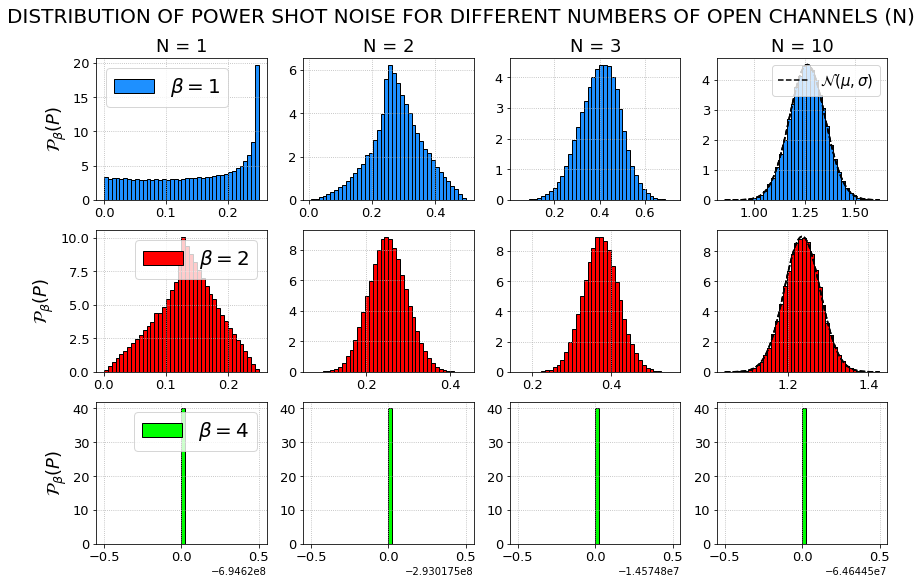

In [15]:
fig, axs = plt.subplots(3,4, figsize = (12,8), constrained_layout = True)

fig.suptitle(r'DISTRIBUTION OF POWER SHOT NOISE FOR DIFFERENT NUMBERS OF OPEN CHANNELS (N)', fontsize = 20)

for j in range(0,4):
    for i in range(0,3):
        
        axs[i,j].tick_params(axis='both', which = 'major', labelsize = 13)
        
        if (j == 3):
            
            axs[0,3].set_title('N = 10', fontsize = 18) 
            
            axs[0,3].hist(P_O[:,9], bins = 40, color='dodgerblue', alpha=1, density = True, histtype='bar', ec='black');
            axs[1,3].hist(P_U[:,9], bins = 40, color='red', alpha=1, density = True, histtype='bar', ec='black');
            axs[2,3].hist(P_S[:,9], bins = 40, color='lime', alpha=1, density = True, histtype='bar', ec='black');
            
            x = np.linspace(np.min(P_O[:,9]), np.max(P_O[:,9]), 100)
            axs[0,3].plot(x,Gaussian(P_O[:,9]), color = 'black', label = r'$\mathcal{N}(\mu,\sigma)$', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
            x = np.linspace(np.min(P_U[:,9]), np.max(P_U[:,9]), 100)
            axs[1,3].plot(x,Gaussian(P_U[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')

            x = np.linspace(np.min(P_S[:,9]), np.max(P_S[:,9]), 100)
            axs[2,3].plot(x,Gaussian(P_S[:,9]), color = 'black', alpha = 1, linewidth = 1.5, linestyle = 'dashed')
            
        else:
            axs[0,j].set_title('N = '+ str(j+1), fontsize = 18)
            if (i == 0):
                axs[i,j].hist(P_O[:,j], bins = 40, color='dodgerblue', label = r'$\beta = 1$', alpha=1, density = True, histtype='bar', ec='black');
            else:
                if (i == 1):
                    axs[i,j].hist(P_U[:,j], bins = 40, color='red', label = r'$\beta = 2$', alpha=1, density = True, histtype='bar', ec='black');
                else:
                    if (i == 2):
                        axs[i,j].hist(P_S[:,j], bins = 40, color='lime', label = r'$\beta = 4$', alpha=1, density = True, histtype='bar', ec='black');
        
        if (j == 0):
            axs[i,0].set_ylabel(r'$\mathcal{P}_{\beta}(P)$', fontsize = 18)
            axs[i,0].legend(fontsize = 20)
            
        if (j == 3 and i == 0):
            axs[0,3].legend(fontsize = 15, loc = "upper right")
        
        axs[i,j].grid(linestyle=':')